Convert svs to dcm, open in Openslide and check diff and attributes

In [ ]:
import openslide
import numpy as np
from PIL import Image
print(openslide.__version__)

1.4.3


In [1]:
%%sh

rm -rf ./data/dicom_dicomizer/*
mkdir -p ./data/dicom_dicomizer/

wsidicomizer -i "./data/wsi/TCGA-C5-A0TN-01Z-00-DX1.D5AB52B6-AD7D-494F-B1AC-E3A72EAD9F51.svs" \
            -o ./data/dicom_dicomizer/TCGA-C5-A0TN-01Z-00-DX1.D5AB52B6-AD7D-494F-B1AC-E3A72EAD9F51 \
            --source opentile \
            -t 256 \
            --format jpeg \
            --quality 100 \
            -w 20 \
            -l 0

In [5]:
%%sh

rm -rf ./data/dicom_wsi2dcm/*
mkdir -p ./data/dicom_wsi2dcm/

wsi2dcm --input ./data/wsi/TCGA-C5-A0TN-01Z-00-DX1.D5AB52B6-AD7D-494F-B1AC-E3A72EAD9F51.svs --outFolder ./data/dicom_wsi2dcm --seriesDescription "" --tileHeight 256 --tileWidth 256 --compression jpeg --threads 20

[2026-01-08 13:58:43.618200] [0x000075de4ffc09c0] [warning] studyId is going to be generated
[2026-01-08 13:58:43.618228] [0x000075de4ffc09c0] [warning] seriesId is going to be generated
[2026-01-08 13:58:43.618231] [0x000075de4ffc09c0] [warning] batch parameter is not set, batch is unlimited
[2026-01-08 13:58:43.636822] [0x000075de4ffc09c0] [info]    dicomization is started
[2026-01-08 14:11:59.750762] [0x000075de4ffc09c0] [info]    dicomization is done


CalledProcessError: Command 'b'\nrm -rf ./data/dicom_wsi2dcm/*\nmkdir -p ./data/dicom_wsi2dcm/\n\nwsi2dcm --input ./data/wsi/TCGA-C5-A0TN-01Z-00-DX1.D5AB52B6-AD7D-494F-B1AC-E3A72EAD9F51.svs --outFolder ./data/dicom_wsi2dcm --seriesDescription "" --tileHeight 256 --tileWidth 256 --compression jpeg --threads 20\n'' returned non-zero exit status 1.

In [2]:
svs_path = "./data/wsi/TCGA-C5-A0TN-01Z-00-DX1.D5AB52B6-AD7D-494F-B1AC-E3A72EAD9F51.svs"
dcm_google_path = "./data/dicom_wsi2dcm/level-0-frames-0-165396.dcm"
dcm_path = "./data/dicom_dicomizer/TCGA-C5-A0TN-01Z-00-DX1.D5AB52B6-AD7D-494F-B1AC-E3A72EAD9F51/1.2.826.0.1.3680043.8.498.23937244397968656497068474487612849103.dcm"

In [7]:
print(openslide.OpenSlide.detect_format(dcm_path))
print(openslide.OpenSlide.detect_format(dcm_google_path))
print(openslide.OpenSlide.detect_format(svs_path))

dicom
dicom
aperio


In [4]:
svs = openslide.OpenSlide(svs_path)

In [5]:
dcm = openslide.OpenSlide(dcm_path)

In [6]:
dcm_google = openslide.OpenSlide(dcm_google_path)

In [8]:
print(f"Levels:\n  SVS:            {svs.level_count}\n  DCM(dicomizer): {dcm.level_count}\n  DCM(wsi2dcm):   {dcm_google.level_count}\n")
print(f"Dimensions:\n  SVS:            {svs.dimensions}\n  DCM(dicomizer): {dcm.dimensions}\n  DCM(wsi2dcm):   {dcm_google.dimensions}\n")
print(f"Downsamples:\n  SVS:            {svs.level_downsamples}\n  DCM(dicomizer): {dcm.level_downsamples}\n  DCM(wsi2dcm):   {dcm_google.level_downsamples}\n")
print(f"Level Dimensions:\n  SVS:            {svs.level_dimensions}\n  DCM(dicomizer): {dcm.level_dimensions}\n  DCM(wsi2dcm):   {dcm_google.level_dimensions}\n")

print("\n")

#print(f"Properties:\n  SVS: {len(svs.properties)} items\n  DCM: {len(dcm.properties)} items")
#print(f"Properies Keys:\n  SVS: {list(svs.properties.keys())}\n  DCM: {list(dcm.properties.keys())}")
#print(f"Vendor:\n  SVS: {svs.properties.get(openslide.PROPERTY_NAME_VENDOR)}\n  DCM: {dcm.properties.get(openslide.PROPERTY_NAME_VENDOR)}")
#print(f"Objective Power:\n  SVS: {svs.properties.get(openslide.PROPERTY_NAME_OBJECTIVE_POWER)}\n  DCM: {dcm.properties.get(openslide.PROPERTY_NAME_OBJECTIVE_POWER)}")

#Go through each property and comprare

#get keys of svs and dcm and make union
keys_union = set(svs.properties.keys()) | set(dcm.properties.keys()) | set(dcm_google.properties.keys())

for key in keys_union:
    svs_value = svs.properties.get(key)
    dcm_value = dcm.properties.get(key)
    dcm_google_value = dcm_google.properties.get(key)
    if svs_value != dcm_value or svs_value != dcm_google_value:
        print(f"Property '{key}' differs:\n  SVS: {svs_value}\n  DCM(dicomizer): {dcm_value}\n  DCM(wsi2dcm): {dcm_google_value}\n")
    else:
        print(f"Property '{key}' matches: {svs_value}")




Levels:
  SVS:            4
  DCM(dicomizer): 4
  DCM(wsi2dcm):   4

Dimensions:
  SVS:            (118080, 91478)
  DCM(dicomizer): (118080, 91478)
  DCM(wsi2dcm):   (118080, 91478)

Downsamples:
  SVS:            (1.0, 4.000043727316454, 16.000524750743395, 32.0038488453464)
  DCM(dicomizer): (1.0, 4.000043727316454, 16.000524750743395, 32.0038488453464)
  DCM(wsi2dcm):   (1.0, 4.000043727316454, 16.000524750743395, 32.0038488453464)

Level Dimensions:
  SVS:            ((118080, 91478), (29520, 22869), (7380, 5717), (3690, 2858))
  DCM(dicomizer): ((118080, 91478), (29520, 22869), (7380, 5717), (3690, 2858))
  DCM(wsi2dcm):   ((118080, 91478), (29520, 22869), (7380, 5717), (3690, 2858))



Property 'dicom.StudyInstanceUID' differs:
  SVS: None
  DCM(dicomizer): 1.2.826.0.1.3680043.8.498.84563317270094250477705012104408964577
  DCM(wsi2dcm): 1.2.276.0.7230010.3.1.2.8323329.22113.1767877123.618845

Property 'dicom.DimensionIndexSequence[1].FunctionalGroupPointer[0]' differs:
  SVS: No

In [11]:
x, y, w, h = 10000, 10000, 64, 64

region_svs = svs.read_region((x, y), 0, (w, h))
region_dcm = dcm.read_region((x, y), 0, (w, h))
region_dcm_google = dcm_google.read_region((x, y), 0, (w, h))

arr_svs = np.array(region_svs)[:, :, :3]
arr_dcm = np.array(region_dcm)[:, :, :3]
arr_dcm_google = np.array(region_dcm_google)[:, :, :3]


diff_svs_svs = np.abs(arr_svs.astype(int) - arr_svs.astype(int))
diff_svs_dcm = np.abs(arr_svs.astype(int) - arr_dcm.astype(int))
diff_svs_dcm_google = np.abs(arr_svs.astype(int) - arr_dcm_google.astype(int))


mean_diff_svs_svs = np.mean(diff_svs_svs)
mean_diff_dcm = np.mean(diff_svs_dcm)
mean_diff_dcm_google = np.mean(diff_svs_dcm_google)

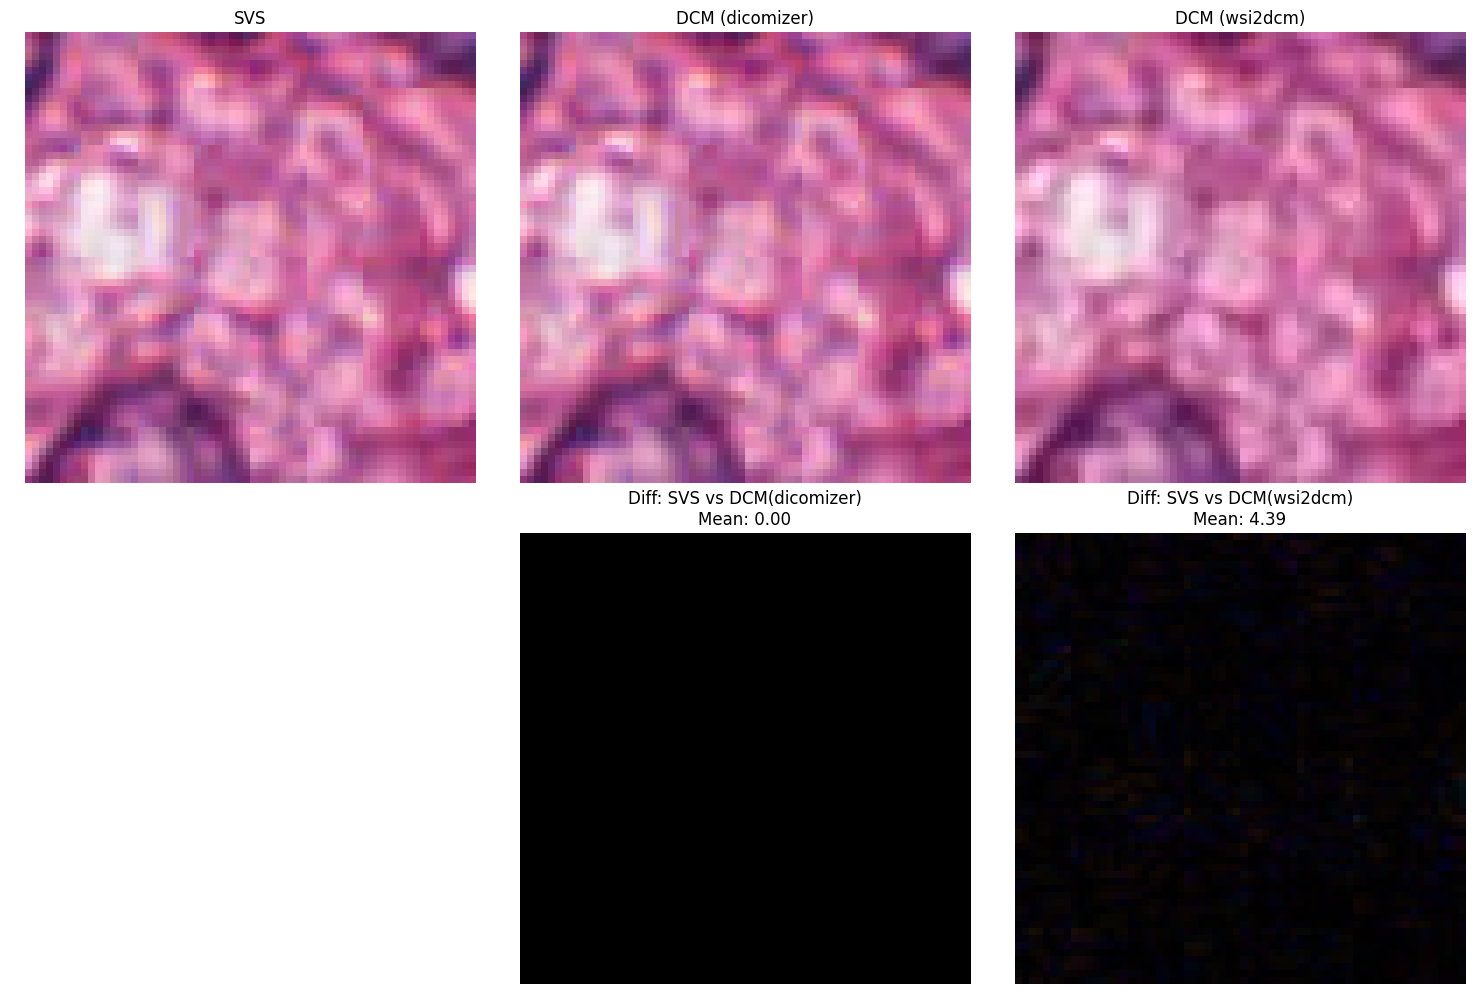

In [12]:


import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(arr_svs)
axes[0, 0].set_title('SVS')
axes[0, 0].axis('off')

axes[0, 1].imshow(arr_dcm)
axes[0, 1].set_title('DCM (dicomizer)')
axes[0, 1].axis('off')

axes[0, 2].imshow(arr_dcm_google)
axes[0, 2].set_title('DCM (wsi2dcm)')
axes[0, 2].axis('off')

#axes[1, 0].imshow(diff_svs_svs)
axes[1, 0].axis('off')

axes[1, 1].imshow(diff_svs_dcm)
axes[1, 1].set_title(f'Diff: SVS vs DCM(dicomizer)\nMean: {mean_diff_dcm:.2f}')
axes[1, 1].axis('off')

axes[1, 2].imshow(diff_svs_dcm_google)
axes[1, 2].set_title(f'Diff: SVS vs DCM(wsi2dcm)\nMean: {mean_diff_dcm_google:.2f}')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()